# CPSC-462 Group 4 Diabetes Prediction Web App


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import time
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, log_loss
from collections import defaultdict, Counter
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from scipy.sparse import vstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter('ignore')
from sklearn.utils import shuffle
import seaborn as sns

In [ ]:
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015_csv.csv")
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
data.shape

(253680, 22)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Cleaning The Data

In [ ]:
data_label = data["Diabetes_012"]
data = data.drop(["Diabetes_012"], axis = 1)
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [ ]:
data_label.head()

0    0
1    0
2    0
3    0
4    0
Name: Diabetes_012, dtype: int64

In [ ]:
data.shape

(253680, 21)

In [ ]:
Final_Data = pd.concat([data, data_label], axis = 1)

In [ ]:
Final_Data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,0


## Spliting data into train, test, and cross validation 

In [ ]:
X_Train, TestData, Y_Train, TestLabels = train_test_split(data, data_label, stratify=data_label, test_size=0.2, random_state=(2022-16-2))

In [ ]:
TrainData, CV_Data, TrainDataLabels, CV_Data_Labels = train_test_split(X_Train, Y_Train, stratify=Y_Train, test_size=0.2)

In [ ]:
X_Train.shape, TestData.shape, Y_Train.shape, TestLabels.shape

((202944, 21), (50736, 21), (202944,), (50736,))

In [ ]:
print('Train data:', TrainData.shape)
print('Test data:', TestData.shape)
print('Cross validation data:', CV_Data.shape)

Train data: (162355, 21)
Test data: (50736, 21)
Cross validation data: (40589, 21)


## Machine Learning

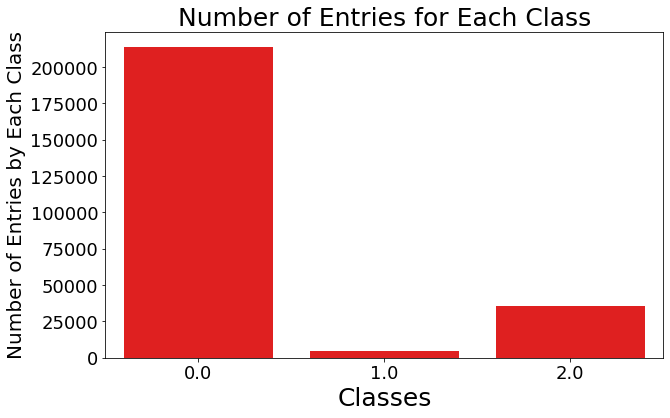

In [ ]:
class_ = Final_Data.Diabetes_012.value_counts().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(class_['index'], class_.Diabetes_012, color="r")
plt.title('Number of Entries for Each Class', fontsize = 25)
plt.xlabel('Classes', fontsize = 25)
plt.ylabel('Number of Entries by Each Class', fontsize = 20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
    
plt.show()

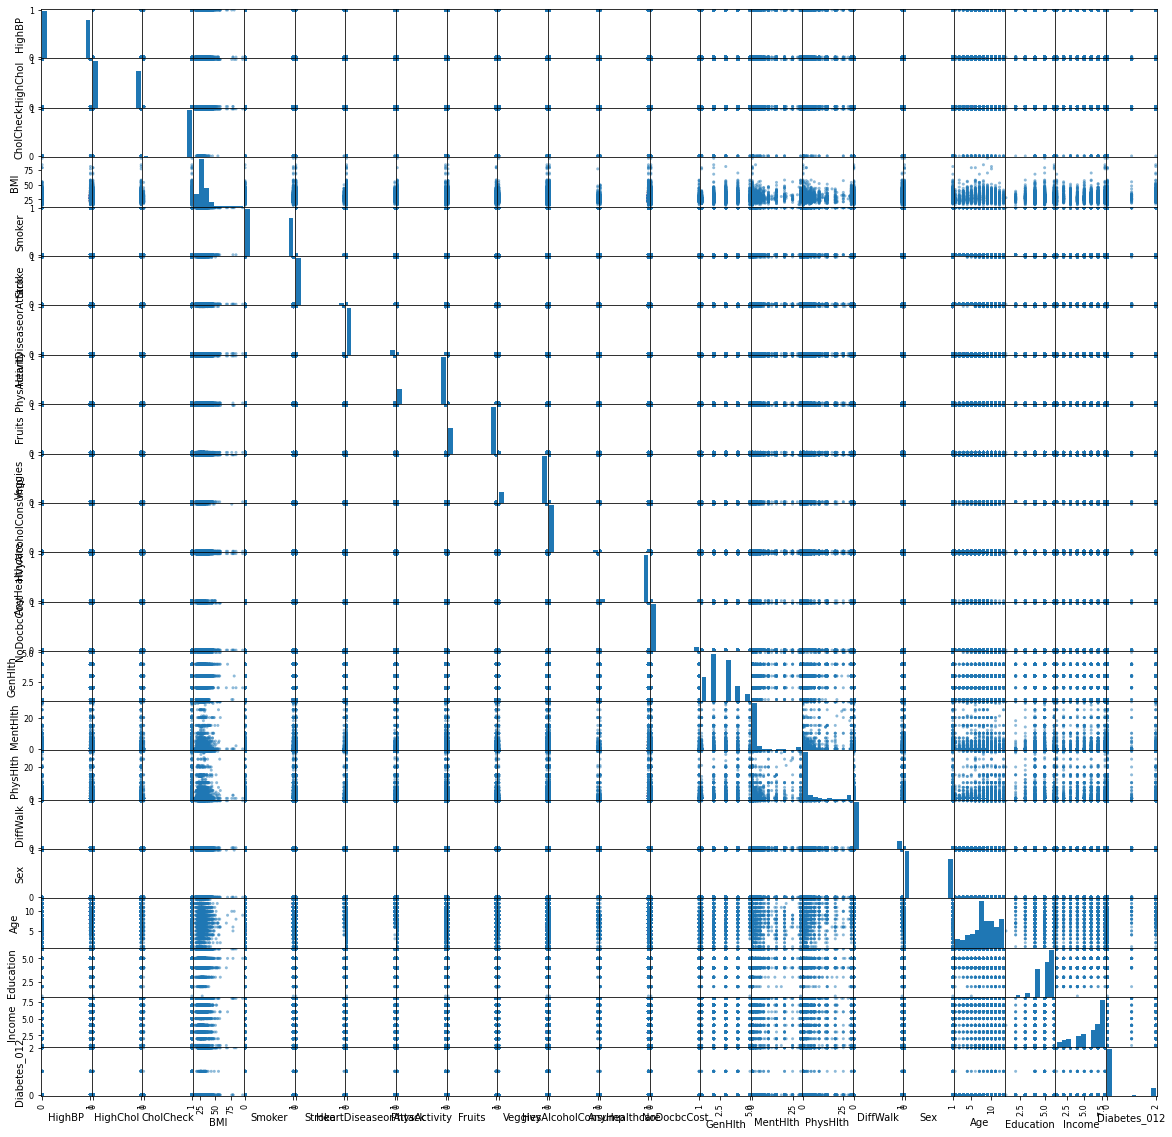

In [ ]:
pd.plotting.scatter_matrix(Final_Data.sample(frac=0.01,replace=True, random_state=1), alpha=0.5, figsize=(20,20))
plt.show()

### XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
from matplotlib import pyplot

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import xgboost as xgb

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
#K-fold cross-validation
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

In [ ]:
model = XGBClassifier()
model.fit(X_Train, Y_Train)

XGBClassifier(objective='multi:softprob')

In [ ]:
# make predictions for CV data

y_pred_CV = model.predict(CV_Data)
predictions_CV = [round(value) for value in y_pred_CV]

In [ ]:
# evaluate predictions

accuracy_CV = accuracy_score(CV_Data_Labels, predictions_CV)
print("Accuracy: %.2f%%" % (accuracy_CV * 100.0))

Accuracy: 84.95%


In [ ]:
# make predictions for test data

y_pred = model.predict(TestData)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions

accuracy = accuracy_score(TestLabels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.06%


In [ ]:
# grid search for learning_rate
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10]
param_grid = dict(learning_rate=learning_rate)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_Train, Y_Train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.393695 using {'learning_rate': 0.1}
-1.089016 (0.000012) with: {'learning_rate': 0.0001}
-1.009649 (0.000112) with: {'learning_rate': 0.001}
-0.602183 (0.000568) with: {'learning_rate': 0.01}
-0.393695 (0.001701) with: {'learning_rate': 0.1}
-0.395604 (0.001787) with: {'learning_rate': 1}
-5.442975 (0.000398) with: {'learning_rate': 10}


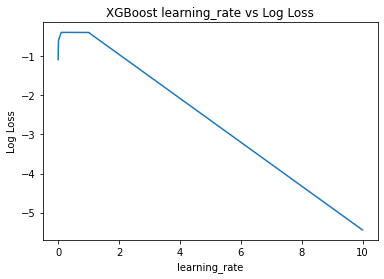

In [ ]:
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

In [ ]:
evals_result ={}

modelEval = XGBClassifier(objective='multi:softprob', eval_metric=["mlogloss"], learning_rate=0.1, 
                       tree_method='gpu_hist', evals_result=evals_result, max_depth=3, n_estimators=400)
# Fit the training datat
eval_set = [(X_Train, Y_Train), (CV_Data, CV_Data_Labels)]
modelEval.fit(X_Train, Y_Train, eval_set=eval_set, verbose=True)

# make predictions for test data
y_predEval = modelEval.predict(CV_Data)
predictionsEval = [round(value) for value in y_predEval]

# evaluate predictions
accuracyEval = accuracy_score(CV_Data_Labels, predictionsEval)
print("Accuracy: %.2f%%" % (accuracyEval * 100.0))

[0]	validation_0-mlogloss:1.00553	validation_1-mlogloss:1.00571
[1]	validation_0-mlogloss:0.927658	validation_1-mlogloss:0.927998
[2]	validation_0-mlogloss:0.861834	validation_1-mlogloss:0.862326
[3]	validation_0-mlogloss:0.805735	validation_1-mlogloss:0.806328
[4]	validation_0-mlogloss:0.75738	validation_1-mlogloss:0.758011
[5]	validation_0-mlogloss:0.71551	validation_1-mlogloss:0.716205
[6]	validation_0-mlogloss:0.679148	validation_1-mlogloss:0.679881
[7]	validation_0-mlogloss:0.647461	validation_1-mlogloss:0.648283
[8]	validation_0-mlogloss:0.619597	validation_1-mlogloss:0.620423
[9]	validation_0-mlogloss:0.595293	validation_1-mlogloss:0.596175
[10]	validation_0-mlogloss:0.573891	validation_1-mlogloss:0.574815
[11]	validation_0-mlogloss:0.555086	validation_1-mlogloss:0.556044
[12]	validation_0-mlogloss:0.53821	validation_1-mlogloss:0.539209
[13]	validation_0-mlogloss:0.523503	validation_1-mlogloss:0.524549
[14]	validation_0-mlogloss:0.51032	validation_1-mlogloss:0.511431
[15]	valida

In [ ]:
evals_result ={}

modelEval = XGBClassifier(objective='multi:softprob', eval_metric=["mlogloss"], learning_rate=0.1, 
                       tree_method='gpu_hist', evals_result=evals_result, max_depth=3, n_estimators=400)
# Fit the training datat
eval_set = [(X_Train, Y_Train), (TestData, TestLabels)]
modelEval.fit(X_Train, Y_Train, eval_set=eval_set, verbose=True)

# make predictions for test data
y_predEval = modelEval.predict(TestData)
predictionsEval = [round(value) for value in y_predEval]

# evaluate predictions
accuracyEval = accuracy_score(TestLabels, predictionsEval)
print("Accuracy: %.2f%%" % (accuracyEval * 100.0))

[0]	validation_0-mlogloss:1.00553	validation_1-mlogloss:1.00545
[1]	validation_0-mlogloss:0.927658	validation_1-mlogloss:0.927595
[2]	validation_0-mlogloss:0.861834	validation_1-mlogloss:0.861824
[3]	validation_0-mlogloss:0.805735	validation_1-mlogloss:0.805723
[4]	validation_0-mlogloss:0.75738	validation_1-mlogloss:0.757321
[5]	validation_0-mlogloss:0.71551	validation_1-mlogloss:0.715423
[6]	validation_0-mlogloss:0.679148	validation_1-mlogloss:0.679009
[7]	validation_0-mlogloss:0.647461	validation_1-mlogloss:0.647369
[8]	validation_0-mlogloss:0.619597	validation_1-mlogloss:0.619487
[9]	validation_0-mlogloss:0.595293	validation_1-mlogloss:0.595236
[10]	validation_0-mlogloss:0.573891	validation_1-mlogloss:0.573862
[11]	validation_0-mlogloss:0.555086	validation_1-mlogloss:0.555059
[12]	validation_0-mlogloss:0.53821	validation_1-mlogloss:0.538192
[13]	validation_0-mlogloss:0.523503	validation_1-mlogloss:0.523513
[14]	validation_0-mlogloss:0.51032	validation_1-mlogloss:0.510395
[15]	valida

In [ ]:
# Generate predictions against our training and test data on 2-18-22
pred_train2 = modelEval.predict(X_Train)
proba_train2 = modelEval.predict_proba(X_Train)
pred_test2 = modelEval.predict(TestData)
proba_test2 = modelEval.predict_proba(TestData)

# Print model report
print("Classification report (Test): \n")
print(metrics.classification_report(TestLabels, pred_test2))
print("Confusion matrix (Test): \n")
print(metrics.confusion_matrix(TestLabels, pred_test2)/len(TestLabels))

print ('\nTrain Accuracy:', metrics.accuracy_score(Y_Train, pred_train2))
print ('Test Accuracy:', metrics.accuracy_score(TestLabels, pred_test2))

print ('\nTrain AUC:', metrics.roc_auc_score(Y_Train, proba_train2, multi_class='ovr'))
print ('Test AUC:', metrics.roc_auc_score(TestLabels, proba_test2, multi_class='ovr'))

print ('\nTrain ROC AUC:', metrics.roc_auc_score(Y_Train, proba_train2, multi_class='ovo', average='weighted'))
print ('Test ROC AUC:', metrics.roc_auc_score(TestLabels, proba_test2, multi_class='ovo', average='weighted'))-

Classification report (Test): 

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.57      0.20      0.30      7069

    accuracy                           0.85     50736
   macro avg       0.48      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736

Confusion matrix (Test): 

[[0.82314333 0.         0.01927625]
 [0.01649716 0.         0.00175418]
 [0.11151845 0.         0.02781063]]

Train Accuracy: 0.8512446783349101
Test Accuracy: 0.8509539577420372

Train AUC: 0.8013807045579947
Test AUC: 0.7888870954418278

Train ROC AUC: 0.7874336500621713
Test ROC AUC: 0.7768949447725537


In [ ]:
evals_result ={}

modelEval = XGBClassifier(objective='multi:softprob', eval_metric=["mlogloss"], learning_rate=0.1, 
                       tree_method='gpu_hist', evals_result=evals_result, max_depth=3, n_estimators=300)
# Fit the training datat
eval_set = [(X_Train, Y_Train), (TestData, TestLabels)]
modelEval.fit(X_Train, Y_Train, eval_set=eval_set, verbose=True)

# make predictions for test data
y_predEval = modelEval.predict(TestData)
predictionsEval = [round(value) for value in y_predEval]

# evaluate predictions
accuracyEval = accuracy_score(TestLabels, predictionsEval)
print("Accuracy: %.2f%%" % (accuracyEval * 100.0))

[0]	validation_0-mlogloss:1.00553	validation_1-mlogloss:1.00545
[1]	validation_0-mlogloss:0.927658	validation_1-mlogloss:0.927595
[2]	validation_0-mlogloss:0.861834	validation_1-mlogloss:0.861824
[3]	validation_0-mlogloss:0.805735	validation_1-mlogloss:0.805723
[4]	validation_0-mlogloss:0.75738	validation_1-mlogloss:0.757321
[5]	validation_0-mlogloss:0.71551	validation_1-mlogloss:0.715423
[6]	validation_0-mlogloss:0.679148	validation_1-mlogloss:0.679009
[7]	validation_0-mlogloss:0.647461	validation_1-mlogloss:0.647369
[8]	validation_0-mlogloss:0.619597	validation_1-mlogloss:0.619487
[9]	validation_0-mlogloss:0.595293	validation_1-mlogloss:0.595236
[10]	validation_0-mlogloss:0.573891	validation_1-mlogloss:0.573862
[11]	validation_0-mlogloss:0.555086	validation_1-mlogloss:0.555059
[12]	validation_0-mlogloss:0.53821	validation_1-mlogloss:0.538192
[13]	validation_0-mlogloss:0.523503	validation_1-mlogloss:0.523513
[14]	validation_0-mlogloss:0.51032	validation_1-mlogloss:0.510395
[15]	valida

In [ ]:
# Generate predictions against our training and test data on 2-23-22. This model is pickled!
pred_train2 = modelEval.predict(X_Train)
proba_train2 = modelEval.predict_proba(X_Train)
pred_test2 = modelEval.predict(TestData)
proba_test2 = modelEval.predict_proba(TestData)

# Print model report
print("Classification report (Test): \n")
print(metrics.classification_report(TestLabels, pred_test2))
print("Confusion matrix (Test): \n")
print(metrics.confusion_matrix(TestLabels, pred_test2)/len(TestLabels))

print ('\nTrain Accuracy:', metrics.accuracy_score(Y_Train, pred_train2))
print ('Test Accuracy:', metrics.accuracy_score(TestLabels, pred_test2))

print ('\nTrain AUC:', metrics.roc_auc_score(Y_Train, proba_train2, multi_class='ovr'))
print ('Test AUC:', metrics.roc_auc_score(TestLabels, proba_test2, multi_class='ovr'))

print ('\nTrain ROC AUC:', metrics.roc_auc_score(Y_Train, proba_train2, multi_class='ovo', average='weighted'))
print ('Test ROC AUC:', metrics.roc_auc_score(TestLabels, proba_test2, multi_class='ovo', average='weighted'))

Classification report (Test): 

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.57      0.20      0.29      7069

    accuracy                           0.85     50736
   macro avg       0.48      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736

Confusion matrix (Test): 

[[0.82310391 0.         0.01931567]
 [0.01647745 0.         0.00177389]
 [0.11179439 0.         0.02753469]]

Train Accuracy: 0.8510081598864712
Test Accuracy: 0.8506385998107853

Train AUC: 0.7993466513276312
Test AUC: 0.789199536320151

Train ROC AUC: 0.7855790953849552
Test ROC AUC: 0.777090261029336


In [ ]:
import warnings
import pickle
warnings.filterwarnings("ignore")

In [ ]:
pickle.dump(modelEval,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

### Navie Byes

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, log_loss
import numpy

In [ ]:
type(TrainDataLabels)

pandas.core.series.Series

In [ ]:
Train_Y = np.array(list(TrainDataLabels))

In [ ]:
type(Train_Y)

numpy.ndarray

In [ ]:
Test_Y = np.array(list(TestLabels))
CV_Y = np.array(list(CV_Data_Labels))

In [ ]:
type(Test_Y)

numpy.ndarray

In [ ]:
#Navie Byes with count vectorizer
alpha = [10**x for x in range(-3, 15)]

log_loss_for_cv = []
for i in alpha:
    clfs = MultinomialNB(alpha=i)
    clfs.fit(TrainData, Train_Y)
    cal_clfs = CalibratedClassifierCV(clfs, method = "sigmoid")
    cal_clfs.fit(TrainData, Train_Y)
    predicted_y = cal_clfs.predict_proba(CV_Data)
    log_loss_for_cv.append(log_loss(CV_Y, predicted_y, labels=clfs.classes_))
    print("For alpha value "+str(i)+" CV log loss = "+str(log_loss(CV_Y, predicted_y, labels=clfs.classes_)))

For alpha value 0.001 CV log loss = 0.47459329788374266
For alpha value 0.01 CV log loss = 0.4745933030750631
For alpha value 0.1 CV log loss = 0.47459335500972916
For alpha value 1 CV log loss = 0.47459387703573697
For alpha value 10 CV log loss = 0.4745993489766516
For alpha value 100 CV log loss = 0.47466899158489195
For alpha value 1000 CV log loss = 0.47529460196119244
For alpha value 10000 CV log loss = 0.47724566806375024
For alpha value 100000 CV log loss = 0.4921411432572735
For alpha value 1000000 CV log loss = 0.4917915222708776
For alpha value 10000000 CV log loss = 0.46652208344106094
For alpha value 100000000 CV log loss = 0.4671507252230391
For alpha value 1000000000 CV log loss = 0.47104670699802353
For alpha value 10000000000 CV log loss = 0.4714500932716916
For alpha value 100000000000 CV log loss = 0.47148969504500593
For alpha value 1000000000000 CV log loss = 0.46966436996940925
For alpha value 10000000000000 CV log loss = 0.48239546758708035
For alpha value 100000

In [ ]:
bestvalue = alpha[np.argmin(log_loss_for_cv)]
clfs = MultinomialNB(alpha=bestvalue)
clfs.fit(TrainData, Train_Y)
cal_clfs = CalibratedClassifierCV(clfs, method = "sigmoid")
cal_clfs.fit(TrainData, Train_Y)

pred_train = cal_clfs.predict_proba(TrainData)
proba_train = cal_clfs.predict_proba(TrainData)
print('Best alpha value= ', bestvalue, "the train log loss =:",log_loss(Train_Y, proba_train, labels=clfs.classes_))

#predict_cv = cal_clfs.predict_proba(CV_X)
#print('Best alpha value= ', bestvalue, "the CV log loss =:",log_loss(CV_Y, predict_cv, labels=clfs.classes_))

pred_test = cal_clfs.predict(TestData)
proba_test = cal_clfs.predict_proba(TestData)
print('Best alpha value= ', bestvalue, "the test log loss =:",log_loss(Test_Y, proba_test, labels=clfs.classes_))

Best alpha value=  10000000 the train log loss =: 0.46830150285772637
Best alpha value=  10000000 the test log loss =: 0.46957457561780036


In [ ]:
print("Navie Byes Classification report (Test): \n")
print(metrics.classification_report(Test_Y, pred_test))
print("Navie Byes Confusion matrix (Test): \n")
print(metrics.confusion_matrix(Test_Y, pred_test)/len(Test_Y))

print ('\nNavie Byes Train Accuracy:', metrics.accuracy_score(Train_Y, cal_clfs.predict(TrainData)))
print ('Navie Byes Test Accuracy:', metrics.accuracy_score(Test_Y, cal_clfs.predict(TestData)))

print ('\nNavie Byes Train AUC:', metrics.roc_auc_score(Train_Y, proba_train, multi_class='ovr'))
print ('Navie Byes Test AUC:', metrics.roc_auc_score(Test_Y, proba_test, multi_class='ovr'))

Navie Byes Classification report (Test): 

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.00      0.00      0.00      7069

    accuracy                           0.84     50736
   macro avg       0.28      0.33      0.30     50736
weighted avg       0.71      0.84      0.77     50736

Navie Byes Confusion matrix (Test): 

[[0.84241958 0.         0.        ]
 [0.01825134 0.         0.        ]
 [0.13932908 0.         0.        ]]

Navie Byes Train Accuracy: 0.8424070709248253
Navie Byes Test Accuracy: 0.8424195837275308

Navie Byes Train AUC: 0.6643370105502803
Navie Byes Test AUC: 0.6640685784702199


In [ ]:
import warnings
import pickle
warnings.filterwarnings("ignore")

In [ ]:
pickle.dump(cal_clfs,open('modelNaiveBayes.pkl','wb'))

### Logistic Regression

In [ ]:
#Logistic regression without class balancing
alpha = [10**x for x in range(-6, 10)]

log_loss_for_cv = []
for i in alpha:
    clfs = SGDClassifier(loss = "log", alpha = i)
    clfs.fit(TrainData, Train_Y)
    cal_clfs = CalibratedClassifierCV(clfs, method = "sigmoid")
    cal_clfs.fit(TrainData, Train_Y)
    predicted_y = cal_clfs.predict_proba(CV_Data)
    log_loss_for_cv.append(log_loss(CV_Y, predicted_y, labels=clfs.classes_))
    print("For alpha value of "+str(i)+" CV log loss = "+str(log_loss(CV_Y, predicted_y, labels=clfs.classes_)))

For alpha value of 1e-06 CV log loss = 0.41478763768846016
For alpha value of 1e-05 CV log loss = 0.4349242057887835
For alpha value of 0.0001 CV log loss = 0.4241239624902547
For alpha value of 0.001 CV log loss = 0.4128987383459749
For alpha value of 0.01 CV log loss = 0.40562224982993506
For alpha value of 0.1 CV log loss = 0.4294767993270445
For alpha value of 1 CV log loss = 0.46608838917541834
For alpha value of 10 CV log loss = 0.48889318025365897
For alpha value of 100 CV log loss = 0.46935573218096893
For alpha value of 1000 CV log loss = 0.4652177256647599
For alpha value of 10000 CV log loss = 0.4645879434135061
For alpha value of 100000 CV log loss = 0.4645681364895891
For alpha value of 1000000 CV log loss = 0.46455214947527745
For alpha value of 10000000 CV log loss = 0.4645444458645484
For alpha value of 100000000 CV log loss = 0.46454397529795566
For alpha value of 1000000000 CV log loss = 0.4645410464929208


In [ ]:
bestvalue = alpha[np.argmin(log_loss_for_cv)]
clfs = SGDClassifier(loss = "log", alpha = bestvalue)
clfs.fit(TrainData, Train_Y)
cal_clfs = CalibratedClassifierCV(clfs, method = "sigmoid")
cal_clfs.fit(TrainData, Train_Y)

pred_train = cal_clfs.predict(TrainData)
proba_train = cal_clfs.predict_proba(TrainData)
print('Best alpha value=', bestvalue, "the train log loss =:",log_loss(Train_Y, proba_train, labels=clfs.classes_))

#predict_cv = cal_clfs.predict_proba(CV_X)
#print('Best alpha value= ', bestvalue, "the CV log loss =:",log_loss(CV_Y, pred_cv, labels=clfs.classes_))

pred_test = cal_clfs.predict(TestData)
proba_test = cal_clfs.predict_proba(TestData)
print('Best alpha value=', bestvalue, "the test log loss =:",log_loss(Test_Y, proba_test, labels=clfs.classes_))

Best alpha value= 0.01 the train log loss =: 0.4058413007653057
Best alpha value= 0.01 the test log loss =: 0.405086424088499


In [ ]:
print("Logistic Regression Classification report (Test): \n")
print(metrics.classification_report(Test_Y, pred_test))
print("Logistic Regression Confusion matrix (Test): \n")
print(metrics.confusion_matrix(Test_Y, pred_test)/len(Test_Y))

print ('\nLogistic Regression Train Accuracy:', metrics.accuracy_score(Train_Y, cal_clfs.predict(TrainData)))
print ('Logistic Regression Test Accuracy:', metrics.accuracy_score(Test_Y, cal_clfs.predict(TestData)))

print ('\nLogistic Regression Train AUC:', metrics.roc_auc_score(Train_Y, proba_train, multi_class='ovr'))
print ('Logistic Regression Test AUC:', metrics.roc_auc_score(Test_Y, proba_test, multi_class='ovr'))

Logistic Regression Classification report (Test): 

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.53      0.16      0.25      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

Logistic Regression Confusion matrix (Test): 

[[0.8236755  0.         0.01874409]
 [0.01671397 0.         0.00153737]
 [0.1164065  0.         0.02292258]]

Logistic Regression Train Accuracy: 0.8456222475439623
Logistic Regression Test Accuracy: 0.8465980763166193

Logistic Regression Train AUC: 0.7678701299254987
Logistic Regression Test AUC: 0.7696331200829475


In [ ]:
#Logistic Regression with  class balancing
alpha = [10**x for x in range(-6, 10)]

log_loss_for_cv = []
for i in alpha:
    clfs = SGDClassifier(loss = "log", alpha = i, class_weight = "balanced")
    clfs.fit(TrainData, Train_Y)
    cal_clfs = CalibratedClassifierCV(clfs, method = "sigmoid")
    cal_clfs.fit(TrainData, Train_Y)
    predicted_y = cal_clfs.predict_proba(CV_Data)
    log_loss_for_cv.append(log_loss(CV_Y, predicted_y, labels=clfs.classes_))
    print("For alpha value of "+str(i)+" CV log loss = "+str(log_loss(CV_Y, predicted_y, labels=clfs.classes_)))

bestvalue = alpha[np.argmin(log_loss_for_cv)]
clfs = SGDClassifier(loss = "log", alpha = bestvalue, class_weight = "balanced")
clfs.fit(TrainData, Train_Y)
cal_clfs = CalibratedClassifierCV(clfs, method = "sigmoid")
cal_clfs.fit(TrainData, Train_Y)

predict_train = cal_clfs.predict_proba(TrainData)
print('Best alpha value=', bestvalue, "the train log loss =:",log_loss(Train_Y, predict_train, labels=clfs.classes_))

predict_test = cal_clfs.predict_proba(TestData)
print('Best alpha value=', bestvalue, "the test log loss =:",log_loss(Test_Y, predict_test, labels=clfs.classes_))

For alpha value of 1e-06 CV log loss = 0.4077324949834072
For alpha value of 1e-05 CV log loss = 0.4155636245896372
For alpha value of 0.0001 CV log loss = 0.4304631824499241
For alpha value of 0.001 CV log loss = 0.4169842405563006
For alpha value of 0.01 CV log loss = 0.40609440739252856
For alpha value of 0.1 CV log loss = 0.41827258100326825
For alpha value of 1 CV log loss = 0.44572698649818326
For alpha value of 10 CV log loss = 0.4843939753231079
For alpha value of 100 CV log loss = 0.48642839940226845
For alpha value of 1000 CV log loss = 0.4703794151323937
For alpha value of 10000 CV log loss = 0.4680860420976142
For alpha value of 100000 CV log loss = 0.46759056966866663
For alpha value of 1000000 CV log loss = 0.4675404998084171
For alpha value of 10000000 CV log loss = 0.4675181091874869
For alpha value of 100000000 CV log loss = 0.46750802580571965
For alpha value of 1000000000 CV log loss = 0.4664539690067428
Best alpha value= 0.01 the train log loss =: 0.4053750701686991

In [ ]:
print("Logistic Regression Classification report (Test): \n")
print(metrics.classification_report(Test_Y, pred_test))
print("Logistic Regression Confusion matrix (Test): \n")
print(metrics.confusion_matrix(Test_Y, pred_test)/len(Test_Y))

print ('\nLogistic Regression Train Accuracy:', metrics.accuracy_score(Train_Y, cal_clfs.predict(TrainData)))
print ('Logistic Regression Test Accuracy:', metrics.accuracy_score(Test_Y, cal_clfs.predict(TestData)))

print ('\nLogistic Regression Train AUC:', metrics.roc_auc_score(Train_Y, proba_train, multi_class='ovr'))
print ('Logistic Regression Test AUC:', metrics.roc_auc_score(Test_Y, proba_test, multi_class='ovr'))

Logistic Regression Classification report (Test): 

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.53      0.16      0.25      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

Logistic Regression Confusion matrix (Test): 

[[0.8236755  0.         0.01874409]
 [0.01671397 0.         0.00153737]
 [0.1164065  0.         0.02292258]]

Logistic Regression Train Accuracy: 0.8457084783345139
Logistic Regression Test Accuracy: 0.8464601072216966

Logistic Regression Train AUC: 0.7678701299254987
Logistic Regression Test AUC: 0.7696331200829475


In [ ]:
pickle.dump(cal_clfs,open('modelLogisticReg.pkl','wb'))

### Random Forest

In [ ]:
#Random Forest
base_learners = [100, 200, 500, 1000]
max_depth_baseLearners = [7, 12]
log_loss_for_cv = []

for i in base_learners:
    for j in max_depth_baseLearners:
        clfs = RandomForestClassifier(n_estimators = i, max_depth = j, n_jobs = -1)
        clfs.fit(X_Train, Y_Train)
        cal_clfs = CalibratedClassifierCV(clfs, method = "sigmoid")
        cal_clfs.fit(X_Train, Y_Train)
        predicted_y = cal_clfs.predict_proba(CV_Data)
        log_loss_for_cv.append(log_loss(CV_Data_Labels, predicted_y, labels=clfs.classes_))
        print("For Number of base learners "+str(i)+" and max depth of a tree "+str(j)+" CV log loss = "+str(log_loss(CV_Data_Labels, predicted_y, labels=clfs.classes_)))

gridlogloss = []
sublogloss = []
x = [x for x in range(1, 8, 2)]
for i in range(8):
    sublogloss.append(np.round(log_loss_for_cv[i], 4))
    if i in x:
        gridlogloss.append(sublogloss)
        sublogloss = []
gridloglossFrame = pd.DataFrame(gridlogloss, columns = max_depth_baseLearners)
gridloglossFrame["Base_Learners"] = base_learners
gridloglossFrame.set_index("Base_Learners", append = False, drop = True, inplace = True)

For Number of base learners 100 and max depth of a tree 7 CV log loss = 0.4020184483349725
For Number of base learners 100 and max depth of a tree 12 CV log loss = 0.3581410136835888
For Number of base learners 200 and max depth of a tree 7 CV log loss = 0.4021130684911638
For Number of base learners 200 and max depth of a tree 12 CV log loss = 0.35725727411862
For Number of base learners 500 and max depth of a tree 7 CV log loss = 0.4020887928150082
For Number of base learners 500 and max depth of a tree 12 CV log loss = 0.35677782895533744
For Number of base learners 1000 and max depth of a tree 7 CV log loss = 0.40210496729681705
For Number of base learners 1000 and max depth of a tree 12 CV log loss = 0.3563013364863038


In [ ]:
best = np.argmin(log_loss_for_cv)
best_estimator = base_learners[int(best/2)]
best_depth = max_depth_baseLearners[int(best/4)]
clfs = RandomForestClassifier(n_estimators = best_estimator, max_depth = best_depth, n_jobs = -1)
clfs.fit(X_Train, Y_Train)
cal_clfs = CalibratedClassifierCV(clfs, method = "sigmoid")
cal_clfs.fit(X_Train, Y_Train)

pred_train = cal_clfs.predict_proba(X_Train)
proba_train = cal_clfs.predict_proba(X_Train)
print("For Number of base learners "+str(best_estimator)+" and max depth of a tree "+str(best_depth)+" Train log loss = "+str(log_loss(Y_Train, proba_train, labels=clfs.classes_)))

#predict_cv = cal_clfs.predict_proba(CV_X)
#print("For Number of base learners "+str(best_estimator)+" and max depth of a tree "+str(best_depth)+" CV log loss = "+str(log_loss(CV_Y, predict_cv, labels=clfs.classes_)))

pred_test = cal_clfs.predict(TestData)
proba_test = cal_clfs.predict_proba(TestData)
print("For Number of base learners "+str(best_estimator)+" and max depth of a tree "+str(best_depth)+" Test log loss = "+str(log_loss(TestLabels, proba_test, labels=clfs.classes_)))

For Number of base learners 1000 and max depth of a tree 12 Train log loss = 0.35725596513175056
For Number of base learners 1000 and max depth of a tree 12 Test log loss = 0.4035438584425164


In [ ]:
print("SVM Classification report (Test): \n")
print(metrics.classification_report(TestLabels, pred_test))
print("SVM Confusion matrix (Test): \n")
print(metrics.confusion_matrix(TestLabels, pred_test)/len(TestLabels))

print ('\nSVM Train Accuracy:', metrics.accuracy_score(Y_Train, cal_clfs.predict(X_Train)))
print ('SVM Test Accuracy:', metrics.accuracy_score(TestLabels, cal_clfs.predict(TestData)))

print ('\nSVM Train AUC:', metrics.roc_auc_score(Y_Train, proba_train, multi_class='ovr'))
print ('SVM Test AUC:', metrics.roc_auc_score(TestLabels, proba_test, multi_class='ovr'))

SVM Classification report (Test): 

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.55      0.23      0.32      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.40      0.41     50736
weighted avg       0.81      0.85      0.82     50736

SVM Confusion matrix (Test): 

[[0.8182947  0.         0.02412488]
 [0.01608325 0.         0.00216809]
 [0.10767502 0.         0.03165405]]

SVM Train Accuracy: 0.8638787054556922
SVM Test Accuracy: 0.8499487543361716

SVM Train AUC: 0.8658040290823009
SVM Test AUC: 0.7845014821063755


In [ ]:
pickle.dump(cal_clfs,open('modelRandomForest.pkl','wb'))

### Linear Support Vector Machine(SVM) 

In [ ]:
#Linear SVM balanced
alpha = [10**x for x in range(-6, 10)]

log_loss_for_cv = []
for i in alpha:
    clfs = SGDClassifier(loss = "hinge", alpha = i, class_weight = "balanced")
    clfs.fit(TrainData, Train_Y)
    cal_clfs = CalibratedClassifierCV(clfs, method = "sigmoid")
    cal_clfs.fit(TrainData, Train_Y)
    predicted_y = cal_clfs.predict_proba(CV_Data)
    log_loss_for_cv.append(log_loss(CV_Y, predicted_y, labels=clfs.classes_))
    print("For alpha value of "+str(i)+" CV log loss = "+str(log_loss(CV_Y, predicted_y, labels=clfs.classes_)))

For alpha value of 1e-06 CV log loss = 0.40899637528164917
For alpha value of 1e-05 CV log loss = 0.4198806226652406
For alpha value of 0.0001 CV log loss = 0.4284446956489475
For alpha value of 0.001 CV log loss = 0.41608877761970414
For alpha value of 0.01 CV log loss = 0.4090584955986916
For alpha value of 0.1 CV log loss = 0.41421117299162963
For alpha value of 1 CV log loss = 0.4364567051444491
For alpha value of 10 CV log loss = 0.4860630043065946
For alpha value of 100 CV log loss = 0.4803507497822662
For alpha value of 1000 CV log loss = 0.467523972823124
For alpha value of 10000 CV log loss = 0.46749435376604775
For alpha value of 100000 CV log loss = 0.46749435108354215
For alpha value of 1000000 CV log loss = 0.46749434650672844
For alpha value of 10000000 CV log loss = 0.46749437534553084
For alpha value of 100000000 CV log loss = 0.4674943782221365
For alpha value of 1000000000 CV log loss = 0.4664324617482294


In [ ]:
bestvalue = alpha[np.argmin(log_loss_for_cv)]
clfs = SGDClassifier(loss = "hinge", alpha = bestvalue, class_weight = "balanced")
clfs.fit(TrainData, Train_Y)
cal_clfs = CalibratedClassifierCV(clfs, method = "sigmoid")
cal_clfs.fit(TrainData, Train_Y)

pred_train = cal_clfs.predict_proba(TrainData)
proba_train = cal_clfs.predict_proba(TrainData)
print('Best alpha value= ', bestvalue, "the train log loss =:",log_loss(Train_Y, proba_train, labels=clfs.classes_))

#predict_cv = cal_clfs.predict_proba(CV_X)
#print('Best alpha value= ', bestvalue, "the CV log loss =:",log_loss(CV_Y, predict_cv, labels=clfs.classes_))

pred_test = cal_clfs.predict(TestData)
proba_test = cal_clfs.predict_proba(TestData)
print('Best alpha value= ', bestvalue, "the test log loss =:",log_loss(Test_Y, proba_test, labels=clfs.classes_))

Best alpha value=  1e-06 the train log loss =: 0.40542610045038735
Best alpha value=  1e-06 the test log loss =: 0.40506097394074625


In [ ]:
print("SVM Classification report (Test): \n")
print(metrics.classification_report(Test_Y, pred_test))
print("SVM Confusion matrix (Test): \n")
print(metrics.confusion_matrix(Test_Y, pred_test)/len(Test_Y))

print ('\nSVM Train Accuracy:', metrics.accuracy_score(Train_Y, cal_clfs.predict(TrainData)))
print ('SVM Test Accuracy:', metrics.accuracy_score(Test_Y, cal_clfs.predict(TestData)))

print ('\nSVM Train AUC:', metrics.roc_auc_score(Train_Y, proba_train, multi_class='ovr'))
print ('SVM Test AUC:', metrics.roc_auc_score(Test_Y, proba_test, multi_class='ovr'))

SVM Classification report (Test): 

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.56      0.10      0.17      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.36      0.36     50736
weighted avg       0.80      0.85      0.79     50736

SVM Confusion matrix (Test): 

[[0.83222958 0.         0.01019   ]
 [0.01738411 0.         0.00086723]
 [0.12551246 0.         0.01381662]]

SVM Train Accuracy: 0.8450001539835545
SVM Test Accuracy: 0.8460461999369284

SVM Train AUC: 0.777855568547907
SVM Test AUC: 0.7754338521362993


In [ ]:
pickle.dump(cal_clfs,open('modelSVM.pkl','wb'))

## Keras Neural Network Model

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=21))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# build the model
history = model.fit(x_train, y_train_enc, epochs=20, batch_size=64, validation_data=(x_test, y_test_enc))

Epoch 1/20
3171/3171 [==============================] - 13s 4ms/step - loss: 0.4333 - accuracy: 0.8392 - val_loss: 0.4242 - val_accuracy: 0.8361
Epoch 2/20
3171/3171 [==============================] - 12s 4ms/step - loss: 0.4176 - accuracy: 0.8435 - val_loss: 0.4116 - val_accuracy: 0.8484
Epoch 3/20
3171/3171 [==============================] - 11s 4ms/step - loss: 0.4127 - accuracy: 0.8448 - val_loss: 0.4054 - val_accuracy: 0.8467
Epoch 4/20
3171/3171 [==============================] - 12s 4ms/step - loss: 0.4094 - accuracy: 0.8450 - val_loss: 0.4158 - val_accuracy: 0.8438
Epoch 5/20
3171/3171 [==============================] - 12s 4ms/step - loss: 0.4080 - accuracy: 0.8453 - val_loss: 0.4096 - val_accuracy: 0.8443
Epoch 6/20
3171/3171 [==============================] - 18s 6ms/step - loss: 0.4073 - accuracy: 0.8463 - val_loss: 0.4042 - val_accuracy: 0.8495
Epoch 7/20
3171/3171 [==============================] - 20s 6ms/step - loss: 0.4067 - accuracy: 0.8466 - val_loss: 0.4039 - val_ac

In [ ]:
model.evaluate(x_test, y_test_enc)

1586/1586 [==============================] - 9s 6ms/step - loss: 0.4061 - accuracy: 0.8497


[0.40611761808395386, 0.849672794342041]

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
pred_test_pool=np.argmax(pred_test, axis=1)

In [ ]:
y_test_pool=np.argmax(y_test_enc, axis=1)

In [ ]:
print("Baseline Classification report (Test): \n")
print(metrics.classification_report(y_test_pool, pred_test_pool))

Baseline Classification report (Test): 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     42741
           1       0.00      0.00      0.00       926
           2       0.62      0.12      0.20      7069

    accuracy                           0.85     50736
   macro avg       0.49      0.37      0.37     50736
weighted avg       0.81      0.85      0.80     50736

